## Testing σ-irregularity vs. total σ-irregularity

### Problem Definition
We are given two measures of a graph irregularity,
*σ-irregularity* and *total σ-irregularity*, defined as bellow:<br /><br />
$$
\sigma(G) = \sum_{(u,v) \in E(G)}(d(u) - d(v))^2 
\quad\text{and}\quad 
\sigma_t(G) = \sum_{(u,v) \in V(G)}(d(u) - d(v))^2
$$.
We are searching for graphs, where the ratio's
$r_{\sigma} = \sigma_t(G)\thinspace/\thinspace\sigma(G)$ 
maximum is reached.

### Problem Classification
It is trivial to see that $r_{\sigma} \geq 1$, 
if in case of $\sigma_t(G) = 0 \implies \sigma(G) = 0$,
we define $r_{\sigma}(G) = 1$. <br />
If the graph $G$ is not connected, 
and it's components are all regular graphs,
then $\sigma(G) = 0$ and $\sigma(G) \neq 0$.<br />
In this situation we shall define $r_{\sigma} = 0$,
as those graphs are not what we are looking for.

If we'd want to find a graph that satisfies the above 
maximization conditions, the brute-force approach would
be to generate all non-isomorphic graphs on $n$ vertices
and calculate their $r_{\sigma}$ value.

This approach will work for very small graphs, 
though as they get bigger its time complexity will explode.<br />
Therefore we will try to implement **simulated annealing**.

### Simulated Annealing
We will try to maximize the function
$r_{\sigma}$ on the space of all graphs with the number of
vertices $n$ through simulated annealing.<br />
Its implementation is similar to the one [here](http://www.cleveralgorithms.com/nature-inspired/physical/simulated_annealing.html).

### The Code
We will walk step by step through the code,
towards the simulated annealing algorithm implementation.

#### libraries
We will need support from the built-in libraries below.

In [11]:
from math import e, log
from random import randint, random
from itertools import combinations

And the following 3rd party libraries.

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

#### base definitions
We need to code the definitions for the
maps $\sigma$ and $\sigma_t$.

In [3]:
def sigma(G):
    sm = 0
    for u, v in G.edges():
        d_u, d_v = map(G.degree, (u, v))
        sm += pow(d_u - d_v, 2)
    return sm

def sigma_t(G):
    sm = 0
    for u, v in combinations(G.nodes(), 2):
        d_u, d_v = map(G.degree, (u, v))
        sm += pow(d_u - d_v, 2)
    return sm

def sigmaRatio(G):
    sG, stG = sigma(G), sigma_t(G)
    return stG / sG if sG > 0 else 1

Here we preference readability over optimization,
as we could calculate `sigma_t` as an addition
to `sigma` return value.

#### simulated annealing implementation
Now we have all that is needed for the 
main method implementation
</div>

In [7]:
def maxSigmaRatio_annealing(n, nsim, temperature=1):
    m = n * (n - 1) // 2
    prob = lambda ci, cr, t: pow(e, (ci - cr) / t)
    temp = lambda i: temperature / log(i)
    random_graph = lambda: nx.gnm_random_graph(
        n, randint(1, m)
    )
    
    _t = random_graph()
    bes = (_t, sigmaRatio(_t))
    cur = (_t.copy(), bes[1])
    curi = _t.copy()

    for i in range(2, nsim + 2):
        t = temp(i)
        curi = random_graph()
        sri = sigmaRatio(curi)

        if sri >= cur[1]:
            cur = (curi.copy(), sri)
            if sri > bes[1]:
                bes = (curi.copy(), sri)

        elif prob(sri, cur[1], t) > random():
            cur = (curi.copy(), sri)

    return bes

#### code execution
Then we can search for the graph, 
where the ratio is maximized.

In [15]:
simulations = 100
graph_nodes = 20
G, sigma_r = maxSigmaRatio_annealing(graph_nodes, simulations)

Finally we can draw the graph with matplotlib.

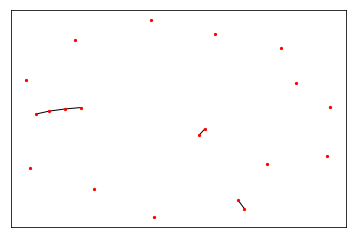

In [16]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='red')
nx.draw_networkx_edges(G, pos)
plt.show()